# Как врать при помощи статистики

## Домашнее задание

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn')
import warnings

warnings.filterwarnings('ignore')

### Задача 1

Сотрудники компании Shmuber, основанной в 2008 году и которая опубликовала свою отчетность, принесли Вам некоторую её часть для публикации в вашем СМИ. Вы уже "собаку съели" на похожих задачах и сразу видите, что графики на самом деле не дают явного ответа на возможные вопросы читателя отчета. 

*Дополнительное задание: опишите, какую дополнительную информацию Вы бы запросили.*

In [234]:
# Загружаем файл в датафрейм
shmuber_df = pd.read_excel('Домашнее_задание_1.xlsx')

In [235]:
# Выводим первые 5 строк
shmuber_df.head()

,year,company,"revenue, $K",rate
0,2008,Shmuber,5,100
1,2008,Kett,1000,100
2,2008,Tindex Taxi,890,100
3,2008,Krap,899,100
4,2008,Loft,760,100


In [236]:
# Создадим список компаний
companies = shmuber_df['company'].unique().tolist()

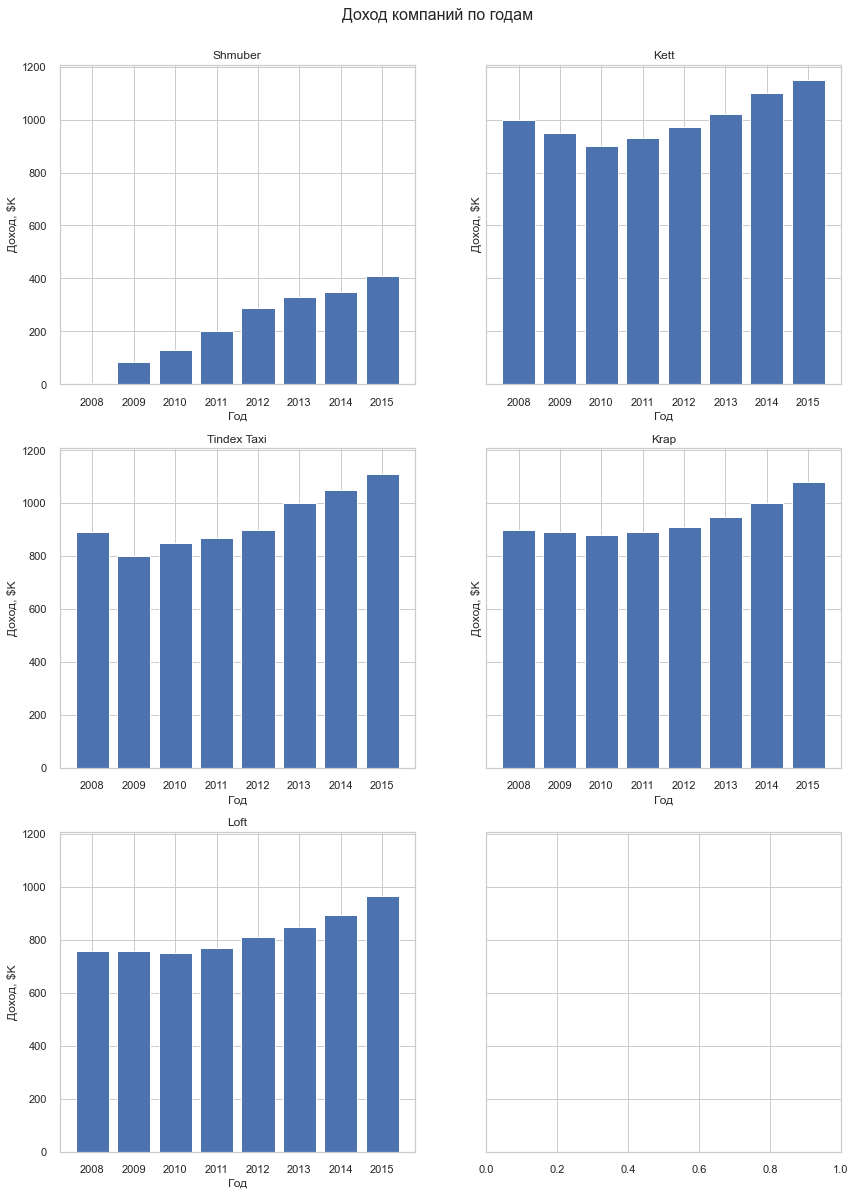

In [263]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(14, 20), sharey=True)

for ax, company in zip(axs.ravel(), companies):
    data=shmuber_df[shmuber_df['company'] == company]
    ax.bar(x='year',
            height='revenue, $K',
            data=data)
    ax.set_title(company)
    ax.set_ylabel('Доход, $K')
    ax.set_xlabel('Год')
    
fig.suptitle('Доход компаний по годам', fontsize=16, y=0.92)
plt.show()

В данном случае мы можем более подробно изучить доходы компаний по годам. При условии общей оси *0y* мы можем также увидеть принципиальную разность количественно.

In [238]:
# Создадим функцию преобразования долей в проценты, относительно предыдущего значения, взятого за 100%
f = lambda x: (1 + x) * 100

In [239]:
# Сортируем датафрейм таким образом, чтобы для каждой компании были значения всех представленных в нем лет
shmuber_df = shmuber_df.sort_values(by=['company', 'year'])

In [251]:
some_list = [] # пустой список нарезанных датафреймов
for a in range(0, len(shmuber_df) - 7, 8):
    shmuber_df_1 = shmuber_df.iloc[a:a+8, :].copy() # режем датафреймы и избавляемся от нежелательных изменений
    shmuber_df_1['pct_change'] = shmuber_df_1['revenue, $K'].pct_change() # считаем последовательно проценты
    shmuber_df_1['pct_change'].fillna(0, inplace=True) # заполняем первые значения каждого дф 0
    shmuber_df_1['dynamic'] = shmuber_df_1['pct_change'].apply(f) # создаем столбец динамики в процентах
    some_list.append(shmuber_df_1)

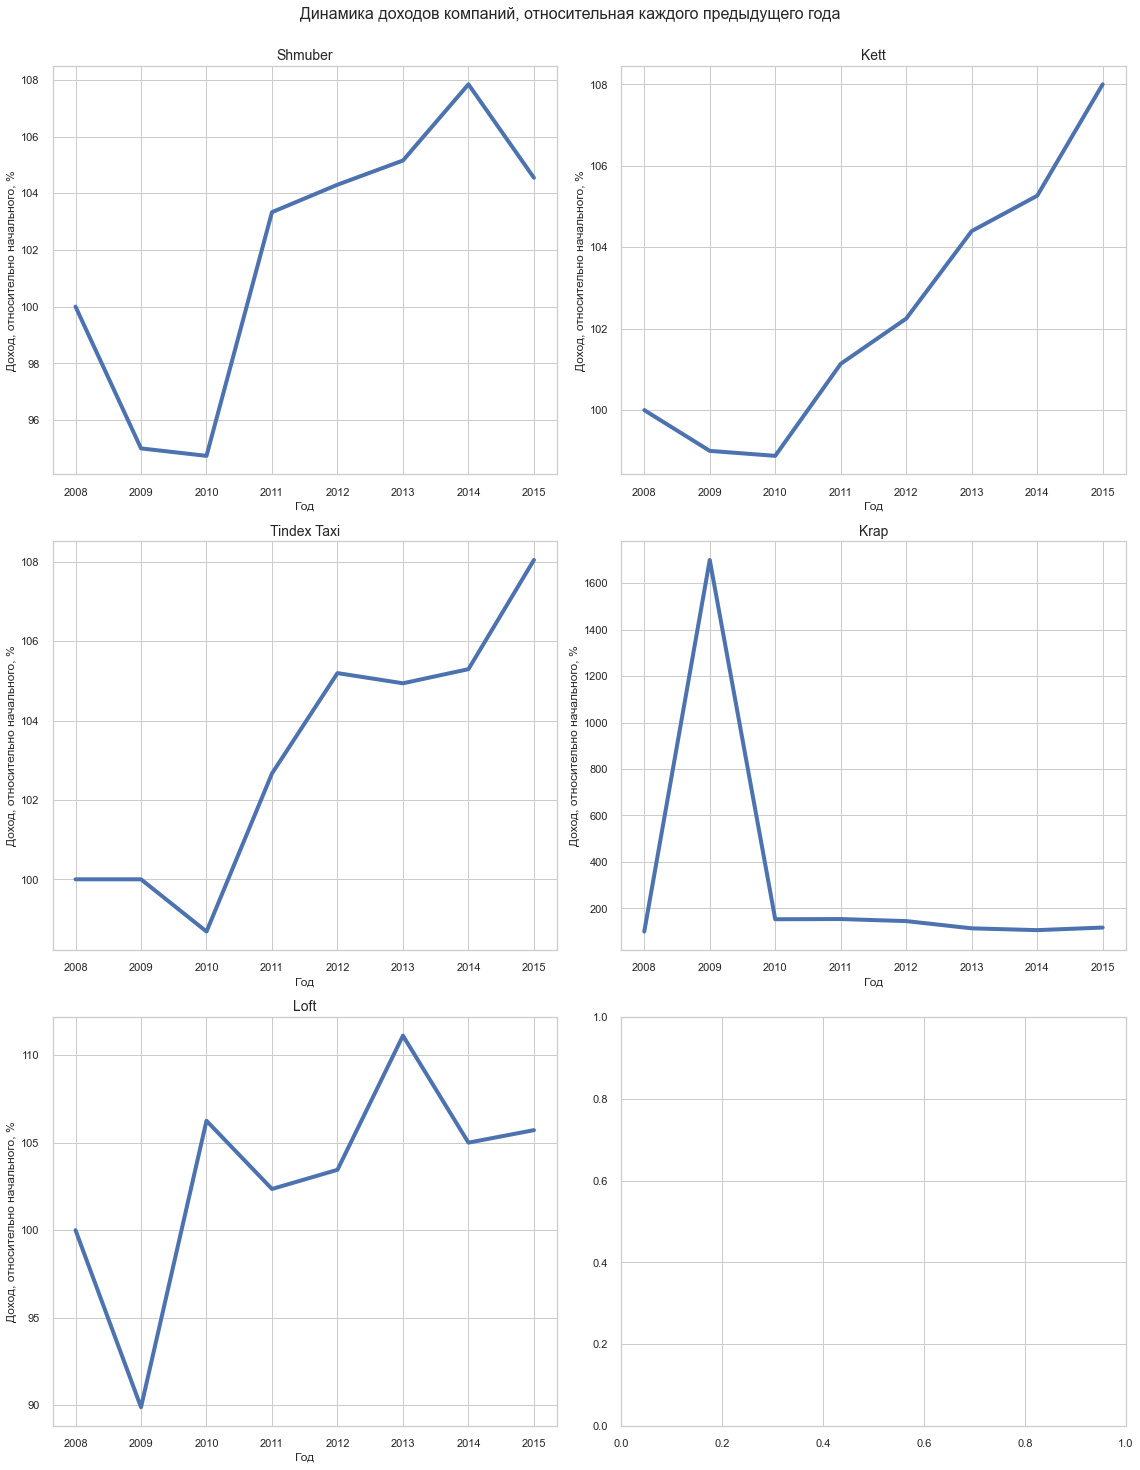

In [267]:
sns.set(style='whitegrid') # белые полотна
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
i = 0
for ax, df in zip(axs.ravel(), some_list):
    sns.lineplot(x='year',
                 y='dynamic',
                 data=df,
                 lw=4,
                 ax=ax)
    ax.set_title(companies[i], fontsize=14)
    ax.set_ylabel('Доход, относительно начального, %')
    ax.set_xlabel('Год')
    i += 1


plt.tight_layout()
fig.suptitle('Динамика доходов компаний, относительная каждого предыдущего года', fontsize=16, y=1.02)
plt.show()

При помощи уже таких графиков, оценивать прибыльность компании гораздо удобнее и проще

**Для верной оценки данных следовало бы запросить даты основания компаний, сезоны, города, страны, где данные компания реализуют свой бизнес.**

### Задача 2

Одна консалтинговая компания попросила вас опубликовать годовую статистику о результатах работы компаний на рынке бытовой техники и прислала вам диаграмму из их отчета. Вы как опытный профессионал задумались перед тем, как публиковать этот материал, как следует изменить визуализацию, чтобы она отражала реальное положение вещей?

На проверку пришлите построенные любым способом графики (с помощью Python, Google Docs, Excel или др.). Снабдите их пояснительной запиской, в которой раскройте, что именно и почему Вы решили изменить.

In [291]:
consult_df = pd.read_excel('Домашнее_задание_2.xlsx', sheet_name='задание 2')

In [292]:
consult_df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,company,"revenue, $M","share, %",year
1,Filip,109,0.082953,2019
2,Widek,100,0.076104,2019
3,Zanudsi,80,0.060883,2019
4,Samzunh,77,0.0586,2019
5,Paranoic,77,0.0586,2019
6,Brenni,60,0.045662,2019
7,others,811,0.617199,2019
8,NaN,NaN,NaN,NaN
9,TOTAL,1314,NaN,NaN


In [293]:
new_columns = list(consult_df.iloc[0].values)
consult_df.columns = new_columns

In [296]:
consult_df.drop([0, 8, 9], inplace=True)

In [298]:
companies = consult_df['company'].unique().tolist()

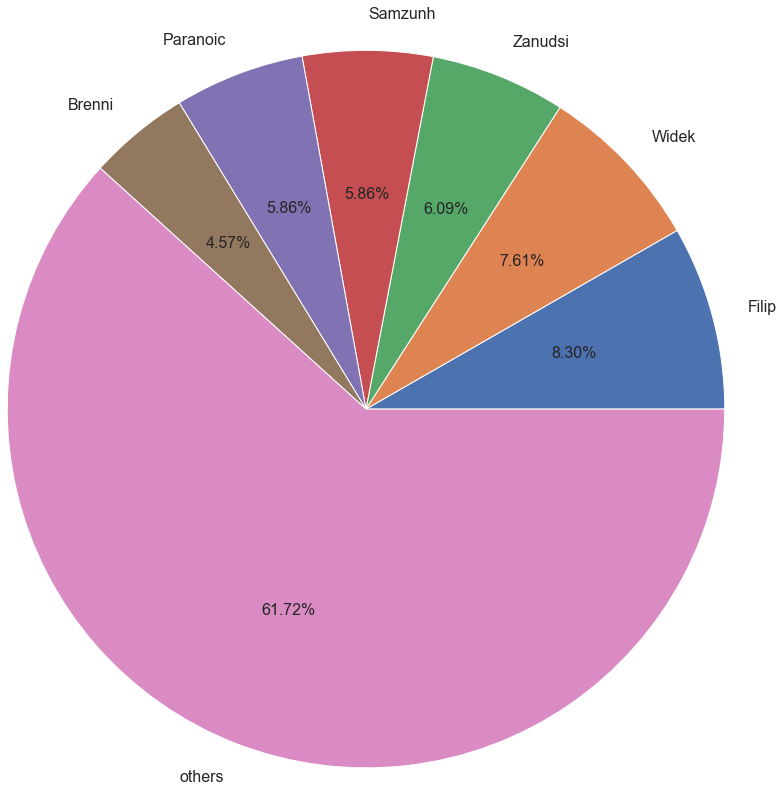

In [303]:
plt.pie(x=consult_df['revenue, $M'],
        labels=companies,
        autopct='%.2f%%',
        radius=3,
        textprops={'fontsize': 16})

plt.show()

График, представленный в файле компании, по своей сути не отражает практически ничего, поскольку компании, относящиеся к others даны в неявном виде. С целью укрытия нежелательных результатов, в группу others вообще может входить 1-2 компании, которые по сути и будут являться лидерами на рынке. Помимо всего прочего, на графике также не было указано процентное соотношение. За 100% все-таки следует брать полную выборку, а не выборку выборки.